## 1. Welcome!
<p><img src="https://assets.datacamp.com/production/project_1170/img/office_cast.jpeg" alt="Markdown">.</p>
<p><strong>The Office!</strong> What started as a British mockumentary series about office culture in 2001 has since spawned ten other variants across the world, including an Israeli version (2010-13), a Hindi version (2019-), and even a French Canadian variant (2006-2007). Of all these iterations (including the original), the American series has been the longest-running, spanning 201 episodes over nine seasons.</p>
<p>In this notebook, we will take a look at a dataset of The Office episodes, and try to understand how the popularity and quality of the series varied over time. To do so, we will use the following dataset: <code>datasets/office_episodes.csv</code>, which was downloaded from Kaggle <a href="https://www.kaggle.com/nehaprabhavalkar/the-office-dataset">here</a>.</p>
<p>This dataset contains information on a variety of characteristics of each episode. In detail, these are:
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/office_episodes.csv</b></div>
<ul>
    <li><b>episode_number:</b> Canonical episode number.</li>
    <li><b>season:</b> Season in which the episode appeared.</li>
    <li><b>episode_title:</b> Title of the episode.</li>
    <li><b>description:</b> Description of the episode.</li>
    <li><b>ratings:</b> Average IMDB rating.</li>
    <li><b>votes:</b> Number of votes.</li>
    <li><b>viewership_mil:</b> Number of US viewers in millions.</li>
    <li><b>duration:</b> Duration in number of minutes.</li>
    <li><b>release_date:</b> Airdate.</li>
    <li><b>guest_stars:</b> Guest stars in the episode (if any).</li>
    <li><b>director:</b> Director of the episode.</li>
    <li><b>writers:</b> Writers of the episode.</li>
    <li><b>has_guests:</b> True/False column for whether the episode contained guest stars.</li>
    <li><b>scaled_ratings:</b> The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).</li>
</ul>
    </div>

In [60]:
# Use this cell to begin your analysis, and add as many as you would like!
import pandas as pd 
import matplotlib.pyplot as plt 

In [61]:
office_edisodes_imp = pd.read_csv('datasets/office_episodes.csv')
print(office_edisodes_imp.sample(n=5))
print(office_edisodes_imp.info())

     episode_number  season     episode_title  \
173             173       9  Dwight Christmas   
115             115       6         The Chump   
165             165       9          New Guys   
35               35       3        The Merger   
80               80       5       Blood Drive   

                                           description  ratings  votes  \
173  Dwight puts together a Pennsylvania Dutch-them...      8.4   2204   
115  Michael continues to see Donna even after lear...      7.8   2113   
165  Dwight and Jim are intimidated by the office's...      7.6   2074   
35   Jan informs Michael that the Scanton branch of...      8.7   3166   
80   Michael holds a lonely hearts party on Valenti...      8.0   2464   

     viewership_mil  duration release_date guest_stars           director  \
173            4.16        22   2012-12-06         NaN  Charles McDougall   
115            6.60        30   2010-05-13         NaN    Randall Einhorn   
165            4.28        23

In [62]:
guests_episodes = office_edisodes_imp[office_edisodes_imp['has_guests'] == True]
guests_episodes.sort_values('viewership_mil', ascending=False).iloc[0]['guest_stars']

'Cloris Leachman, Jack Black, Jessica Alba'

In [63]:
top_star = 'Cloris Leachman'

In [64]:
colors = []
for lab, row in office_edisodes_imp.iterrows():
    if row['scaled_ratings'] < 0.25:
        colors.append('red')
    elif row['scaled_ratings'] < 0.50:
        colors.append('orange')
    elif row['scaled_ratings'] < 0.75:
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')

In [65]:
sizes = []
for lab, row in office_edisodes_imp.iterrows():
    if row['has_guests']:
        sizes.append(250)
    else:
        sizes.append(25)

Text(0, 0.5, 'Viewership (Millions)')

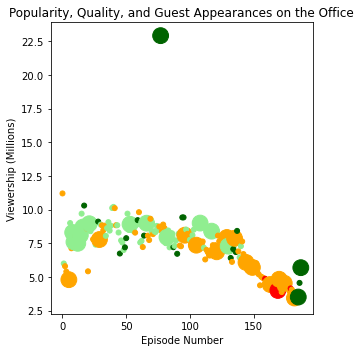

In [66]:
fig = plt.figure()
plt.rcParams['figure.figsize'] = [5, 5]
plt.scatter(x=office_edisodes_imp['episode_number'], y=office_edisodes_imp['viewership_mil'], c=colors, s=sizes)
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')